<a href="https://colab.research.google.com/github/sainathnallagonda/Netflix_Case_Study/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Defining Problem Statement and Analysing basic metrics.
# Business Problem:

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

The dataset contains over 8807 Rows, 12 columns. After a quick view of the data frames, it looks like a typical movie/TVshows data frame without ratings. We can also see that there are NaN values in some columns.

**2.Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to ‘category’, missing value detection, statistical summary.**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#shape of data
df.ndim

2

In [ ]:
#datatypes of all the attributes
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
print(df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [ ]:
print(df.apply(lambda x:x.isnull().sum(),axis = 0))

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.isnull().sum().sum()

4307

From the above information we see that there are some columns which contains null values. Columns that contains null values are “director”, “cast”, “country”, “date_added”, “rating”, “duration”.

In [ ]:
#Replacing Null values with 0s
df.director.fillna(0,inplace = True)
df.cast.fillna(0,inplace = True)
df.country.fillna(0,inplace = True)
df.duration.fillna(0,inplace = True)
df.dropna(subset = ["date_added","rating"],inplace = True)


<ipython-input-11-baf37807a325>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.director.fillna(0,inplace = True)
<ipython-input-11-baf37807a325>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [ ]:
print(df.isnull().any())

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool


In [ ]:
df.describe()

,release_year
count,8793.000000
mean,2014.183100
std,8.824128
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**3.Non Graphical Analysis:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8793 non-null   object
 1   type          8793 non-null   object
 2   title         8793 non-null   object
 3   director      8793 non-null   object
 4   cast          8793 non-null   object
 5   country       8793 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8793 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8793 non-null   object
 10  listed_in     8793 non-null   object
 11  description   8793 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.0+ KB


In [ ]:
#description after data cleaning
df.describe()

,release_year
count,8793.000000
mean,2014.183100
std,8.824128
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Value Counts for each categorical variable**

In [ ]:
type_counts = df['type'].value_counts()
country_counts = df['country'].value_counts()
rating_counts = df['rating'].value_counts()
listed_in_counts = df['listed_in'].value_counts()
type_counts, country_counts, rating_counts, listed_in_counts


(type
 Movie      6129
 TV Show    2664
 Name: count, dtype: int64,
 country
 United States                             2812
 India                                      972
 0                                          829
 United Kingdom                             418
 Japan                                      243
                                           ... 
 Romania, Bulgaria, Hungary                   1
 Uruguay, Guatemala                           1
 France, Senegal, Belgium                     1
 Mexico, United States, Spain, Colombia       1
 United Arab Emirates, Jordan                 1
 Name: count, Length: 749, dtype: int64,
 rating
 TV-MA       3205
 TV-14       2157
 TV-PG        861
 R            799
 PG-13        490
 TV-Y7        333
 TV-Y         306
 PG           287
 TV-G         220
 NR            79
 G             41
 TV-Y7-FV       6
 NC-17          3
 UR             3
 74 min         1
 84 min         1
 66 min         1
 Name: count, dtype: int64,
 listed_in
 

**4: Exploratory Analysis and Visualization**

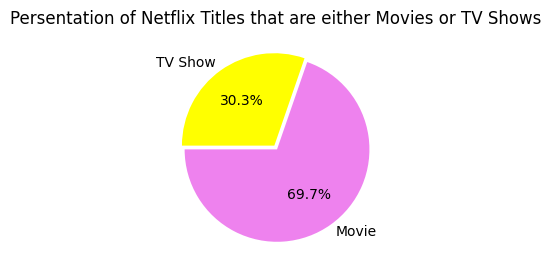

In [ ]:
#Total Number of movies and TV Shows:
plt.figure(figsize=(6,3))
plt.title("Persentation of Netflix Titles that are either Movies or TV Shows")
g=plt.pie(df.type.value_counts(),explode=(0.025,0.025),
labels=df.type.value_counts().index, colors=['violet','yellow'],autopct='%1.1f%%',
startangle=180)
plt.show()


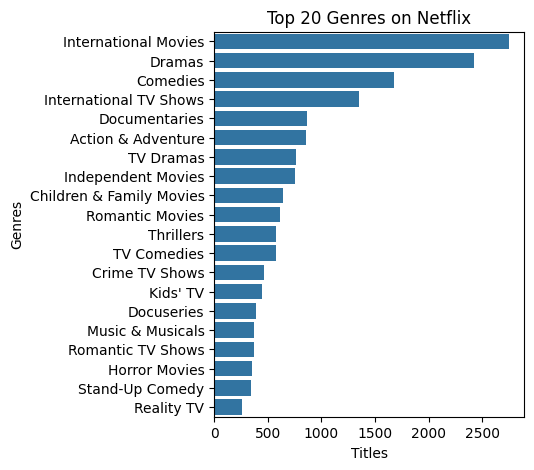

In [ ]:
#Top 20 Genres on Netflix: Count Plot
filtered_genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)
plt.figure(figsize=(4, 5))
g = sns.countplot(y=filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


In [ ]:
#Number of movies produced in each country:
movies_by_country = df[df['type'] == 'Movie'].groupby('country')['title'].nunique().nlargest(10)
print(movies_by_country)


country
United States     2058
India              893
0                  439
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Japan               76
Name: title, dtype: int64


In [ ]:
#Number of TV Shows produced in each country
tv_shows_by_country = df[df['type'] == 'TV Show'].groupby('country')['title'].nunique().nlargest(10)
print(tv_shows_by_country)

country
United States     754
0                 390
United Kingdom    212
Japan             167
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Name: title, dtype: int64


In [ ]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['week_added'] = df['date_added'].dt.isocalendar().week
df['month_added'] = df['date_added'].dt.month

tv_shows_week = df[df['type'] == 'TV Show'].groupby('week_added')['title'].count().idxmax()
movies_week = df[df['type'] == 'Movie'].groupby('week_added')['title'].count().idxmax()

tv_shows_week, movies_week


(27, 1)

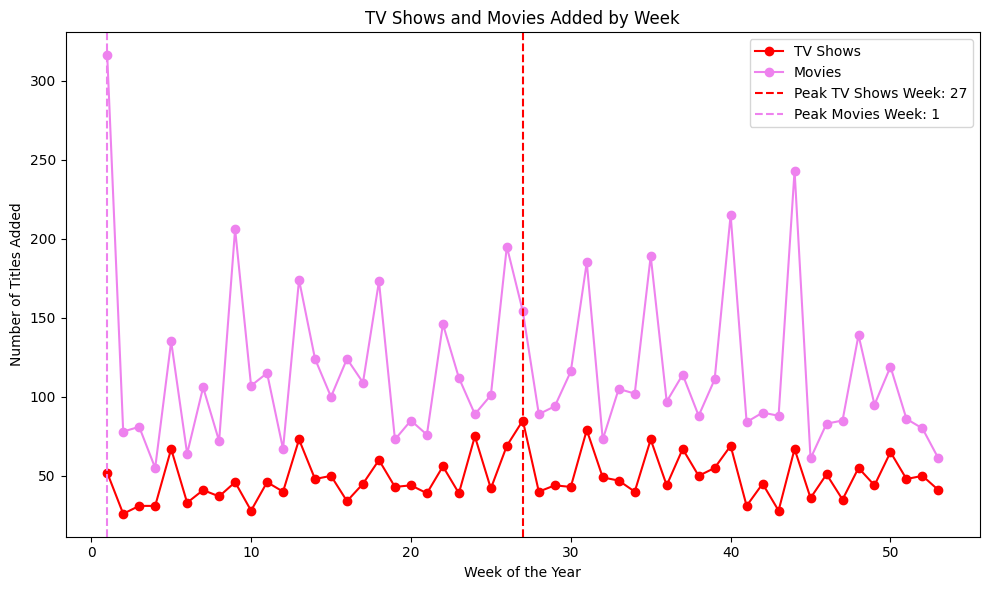

In [ ]:
tv_shows_by_week = df[df['type'] == 'TV Show'].groupby('week_added')['title'].count()
movies_by_week = df[df['type'] == 'Movie'].groupby('week_added')['title'].count()
tv_shows_week = tv_shows_by_week.idxmax()
movies_week = movies_by_week.idxmax()
plt.figure(figsize=(10, 6))
plt.plot(tv_shows_by_week.index, tv_shows_by_week.values, label='TV Shows', color='red', marker='o')
plt.plot(movies_by_week.index, movies_by_week.values, label='Movies', color='violet', marker='o')
plt.axvline(x=tv_shows_week, color='red', linestyle='--', label=f'Peak TV Shows Week: {tv_shows_week}')
plt.axvline(x=movies_week, color='violet', linestyle='--', label=f'Peak Movies Week: {movies_week}')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Titles Added')
plt.title('TV Shows and Movies Added by Week')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['week_added'] = df['date_added'].dt.isocalendar().week
df['month_added'] = df['date_added'].dt.month

tv_shows_month = df[df['type'] == 'TV Show'].groupby('month_added')['title'].count().idxmax()
movies_month = df[df['type'] == 'Movie'].groupby('month_added')['title'].count().idxmax()

tv_shows_month, movies_month


(7, 7)

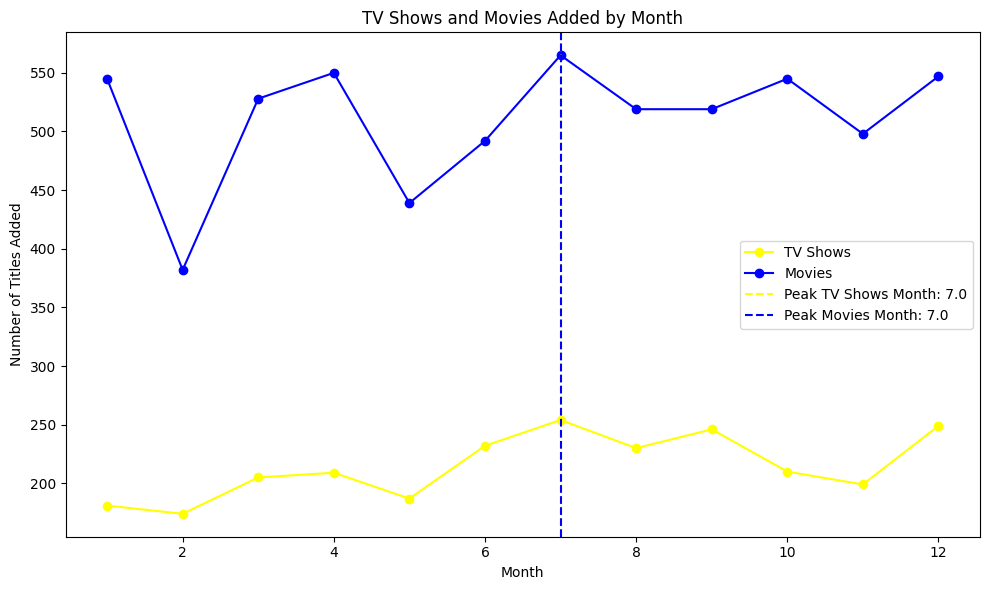

In [ ]:
tv_shows_by_month = df[df['type'] == 'TV Show'].groupby('month_added')['title'].count()
movies_by_month = df[df['type'] == 'Movie'].groupby('month_added')['title'].count()
tv_shows_month = tv_shows_by_month.idxmax()
movies_month = movies_by_month.idxmax()
plt.figure(figsize=(10, 6))
plt.plot(tv_shows_by_month.index, tv_shows_by_month.values, label='TV Shows', color='yellow', marker='o')
plt.plot(movies_by_month.index, movies_by_month.values, label='Movies', color='blue', marker='o')
plt.axvline(x=tv_shows_month, color='yellow', linestyle='--', label=f'Peak TV Shows Month: {tv_shows_month}')
plt.axvline(x=movies_month, color='blue', linestyle='--', label=f'Peak Movies Month: {movies_month}')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.title('TV Shows and Movies Added by Month')
plt.legend()
plt.tight_layout()
plt.show()


**Genre movies are more popular or produced more using word cloud**

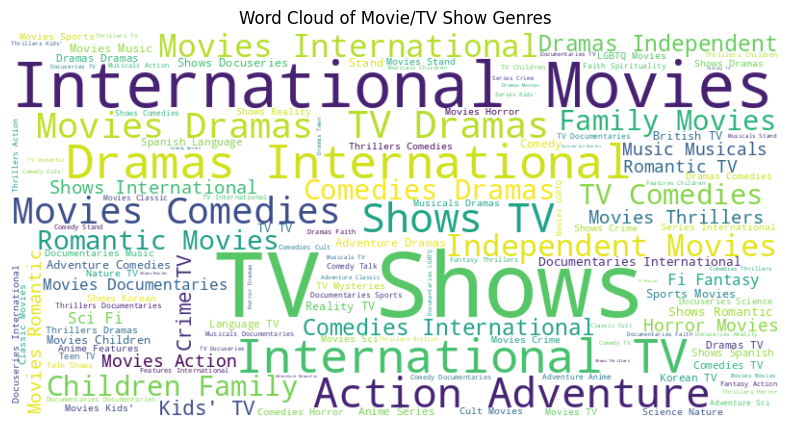

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
genre_data = df['listed_in'].dropna()
all_genres = ' '.join(genre_data)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Movie/TV Show Genres')
plt.show()


The mode of the difference between release and addition to Netflix in months is: 11 months


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


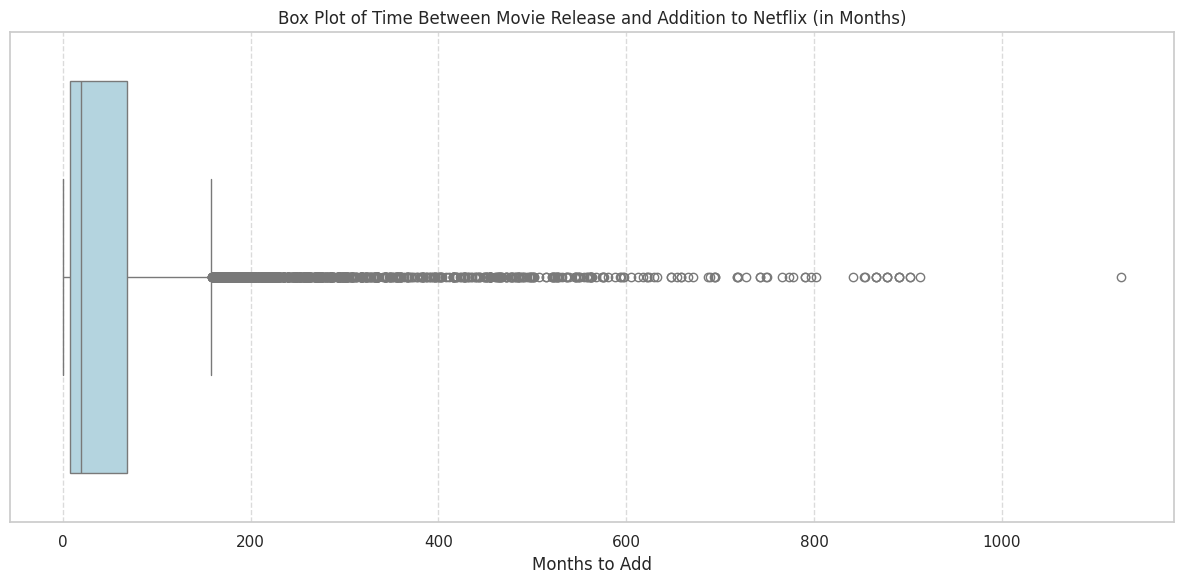

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['release_date'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')
df['months_to_add'] = ((df['date_added'].dt.year - df['release_date'].dt.year) * 12 +
                       (df['date_added'].dt.month - df['release_date'].dt.month))

df = df[df['months_to_add'] >= 0]


mode_months = df['months_to_add'].mode()[0]
print(f"The mode of the difference between release and addition to Netflix in months is: {mode_months} months")
df['years_to_add'] = df['months_to_add'] // 12
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='months_to_add', color='lightblue')
plt.title('Box Plot of Time Between Movie Release and Addition to Netflix (in Months)')
plt.xlabel('Months to Add')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**INSIGHTS**:

**Data Overview**: The dataset has 8,807 rows and 12 columns, giving us a broad look at Netflix content (without ratings). There are missing values in important fields like director, cast, and country. To fix this, missing values were either filled with 0 or some rows were removed, especially for columns like "date_added" and "rating."

**Content Types**: The data shows that Netflix has many movies and TV shows, with more movies than TV shows. It also focuses on the countries that produce the most content, highlighting the top 10 countries for both.

**Genres**: An analysis of the top 20 genres shows that "Drama" and "Comedy" are the most popular. A word cloud was created to show the variety of genres available on Netflix.

**Best Week for Releases**:
TV Shows: Week 27 (late June to early July).
Movies: Week 1 (early January).

**Best Month for Releases**:
July is the month when most movies and TV shows are released.
Top Directors and Actors: The top 10 directors and actors were identified, which can help Netflix focus on content featuring popular people to engage viewers.

**Time Between Release and Addition to Netflix**: On average, it takes about 11 months from when a movie is released to when it’s added to Netflix. This can affect how "fresh" the content feels to users.

**RECOMMENDATIONS**:

**Focus on International Markets**:
Netflix should make more content specific to countries like the USA and India, which produce a lot of movies and TV shows. Understanding what people in these regions like will help Netflix create better content for them.
Genre Expansion:

**Diversify Genre Offerings**:
Netflix could make more content in genres that are less common but have growing interest, like "Documentary" or "Fantasy," to attract more viewers.
Optimize Release Timings:

**Take Advantage of Key Release Periods**:
Since July is the best month for releasing both movies and TV shows, Netflix can focus on big marketing campaigns and exclusive releases during this time. January is also a good time for releasing movies, possibly with New Year promotions.

**Work with Top Actors and Directors**:
Netflix should continue working with the top 10 directors and actors identified in the data. This will likely lead to content that attracts more viewers.
Content Freshness:

**Reduce Time to Add New Content**:
Since it takes about 11 months for a movie to be added to Netflix after its release, Netflix should try to shorten this time. Getting streaming rights faster will help Netflix offer newer content and stay ahead of competitors.
Improve Data Completeness:

**Enhance Data Quality**:
Many important fields like director, cast, and country have missing data. Netflix should make sure the data is complete to improve decision-making. Using automated tools to keep the data clean will lead to better insights and more informed choices.By following these recommendations, Netflix can grow its user base, improve its content, and better serve audiences around the world.


